In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from nnpde2diff1d import NNPDE2DIFF1D
from pde2diff1d import PDE2DIFF1D

In [2]:
%%javascript
MathJax.Hub.Config({
      TeX: { equationNumbers: { autoNumber: "AMS" } }
    });MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);
MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);

<IPython.core.display.Javascript object>

## The problem

### Create the training data.

In [3]:
nx = 10
nt = 11
xt = np.linspace(0, 1, nx)
tt = np.linspace(0, 1, nt)
x_train = np.array(list(zip(np.tile(xt, nt), np.repeat(tt, nx))))

### Read the differential equation.

In [4]:
eq_name = 'diff1d_0'
eq = PDE2DIFF1D(eq_name)

### Compute the analytical solution.

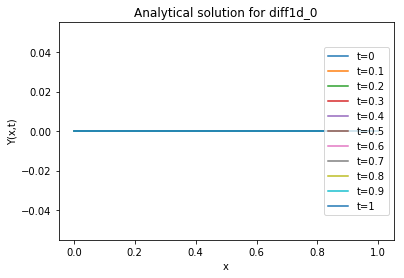

In [5]:
n = nx*nt
Ya = np.zeros(n)
for i in range(n):
    Ya[i] = eq.Yaf(x_train[i])
Ya = Ya.reshape((nt, nx))
for i in range(nt):
    plt.plot(xt, Ya[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Y(x,t)')
plt.legend(loc='right')
plt.title('Analytical solution for %s' % eq_name);

## Newton-CG (default)

In [6]:
net1 = NNPDE2DIFF1D(eq)
trainalg = 'Newton-CG'
options = {}
options['disp'] = True
opts = {}
np.random.seed(1)
%timeit -n 1 -r 1 net1.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net1.res)

Optimization terminated successfully.
         Current function value: 0.000030
         Iterations: 22
         Function evaluations: 30
         Gradient evaluations: 261
         Hessian evaluations: 0
33.8 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
     fun: 2.95128621767925e-05
     jac: array([ 0.00988575,  0.00059944, -0.00483401, -0.00179861, -0.00179094,
        0.00150923, -0.0017196 , -0.00631802,  0.00700462, -0.0053908 ,
        0.00939525,  0.00058543, -0.00452568, -0.00155012, -0.00164552,
        0.00137327, -0.00175721, -0.00632374,  0.00677174, -0.00531087,
        0.01147693,  0.00072946, -0.00573203, -0.00199768, -0.00196987,
        0.00169487, -0.00212312, -0.00759829,  0.00847638, -0.00638143,
       -0.03341867, -0.04881066, -0.01113391, -0.0373592 , -0.02269666,
       -0.03321958, -0.0118749 , -0.01619796, -0.01066808, -0.03515121])
 message: 'Optimization terminated successfully.'
    nfev: 30
    nhev: 0
     nit: 22
    njev: 261
  status: 0

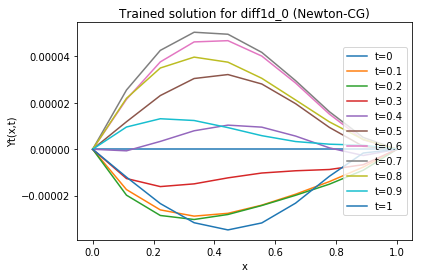

In [7]:
Yt1 = net1.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s)' % (eq_name, trainalg));

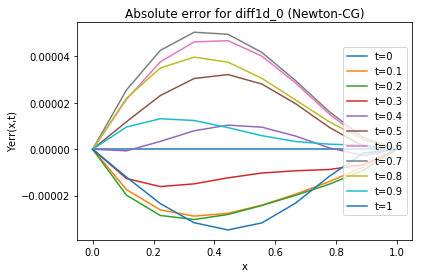

In [8]:
Y_err1 = Yt1 - Ya
for i in range(nt):
    plt.plot(xt, Y_err1[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s)' % (eq_name, trainalg));

## Newton-CG (xtol=1e-6)

In [9]:
net2 = NNPDE2DIFF1D(eq)
trainalg = 'Newton-CG'
options = {}
options['disp'] = True
options['xtol'] = 1e-6
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net2.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net2.res)

Optimization terminated successfully.
         Current function value: 0.000010
         Iterations: 22
         Function evaluations: 33
         Gradient evaluations: 308
         Hessian evaluations: 0
40.1 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
     fun: 1.0032983747323597e-05
     jac: array([ 1.70093901e-04, -1.48890207e-04,  1.13309375e-04,  3.05537865e-06,
        3.85388284e-04, -2.34284389e-04, -1.80877949e-04,  7.02142192e-06,
       -3.85014661e-05, -2.21616557e-04,  4.88868141e-04, -4.05767528e-04,
        3.13221740e-04,  5.76549822e-06,  6.56825237e-04, -3.74006957e-04,
       -2.97175514e-04,  6.59773872e-05, -3.57437225e-04, -3.90322497e-04,
        5.40502453e-04, -4.72292639e-04,  3.85678679e-04,  6.63219817e-06,
        7.51854443e-04, -4.24311868e-04, -3.38917833e-04,  6.35523438e-05,
       -4.31020388e-04, -4.50967352e-04, -4.96612317e-03, -4.06964775e-03,
       -3.38362543e-03, -4.80953009e-03, -1.05423675e-03, -2.47611034e-03,
       -1.054

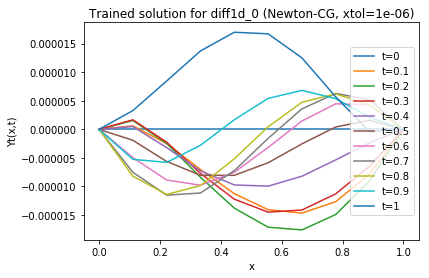

In [10]:
Yt2 = net2.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt2[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, xtol=%g)' % (eq_name, trainalg, options['xtol']));

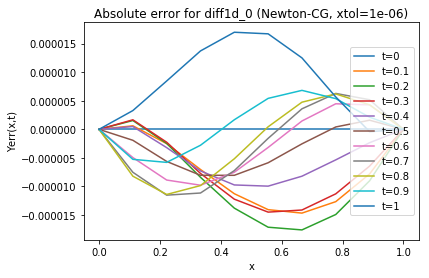

In [11]:
Y_err2 = Yt2 - Ya
for i in range(nt):
    plt.plot(xt, Y_err2[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, xtol=%g)' % (eq_name, trainalg, options['xtol']));

## Newton-CG (xtol=1e-8)

In [13]:
net3 = NNPDE2DIFF1D(eq)
trainalg = 'Newton-CG'
options = {}
options['disp'] = True
options['xtol'] = 1e-8
opts = {}
np.random.seed(1)
%timeit -n 1 -r 1 net3.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net3.res)

         Current function value: 0.000000
         Iterations: 118
         Function evaluations: 187
         Gradient evaluations: 22821
         Hessian evaluations: 0
47min 51s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
     fun: 1.213555929962241e-08
     jac: array([-2.37560659e-05, -1.52976641e-06,  1.28635307e-05,  1.08835801e-06,
       -8.28312918e-07, -6.79399758e-07,  4.64599873e-06,  1.73740903e-05,
       -1.54663276e-05,  1.50063973e-05, -2.32976584e-05, -1.66993034e-06,
        1.37926178e-05,  1.11447544e-06, -7.18162250e-07, -6.59763460e-07,
        5.09863431e-06,  1.79150988e-05, -1.71231044e-05,  1.54050158e-05,
       -2.61106524e-05, -1.80292095e-06,  1.51027450e-05,  1.17486196e-06,
       -8.69921292e-07, -6.99264201e-07,  5.50054792e-06,  1.98522497e-05,
       -1.84491727e-05,  1.71522756e-05,  9.03732152e-05,  1.25618367e-04,
        2.54142705e-05,  9.42148404e-05,  5.24732637e-05,  8.10634180e-05,
        2.97620923e-05,  4.23805119e-05,  2.3

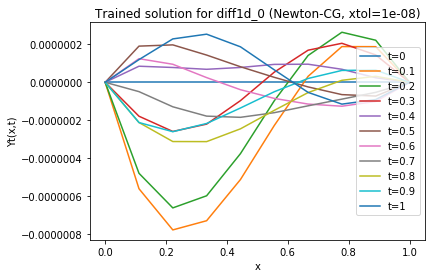

In [14]:
Yt3 = net3.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt3[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, xtol=%g)' % (eq_name, trainalg, options['xtol']));

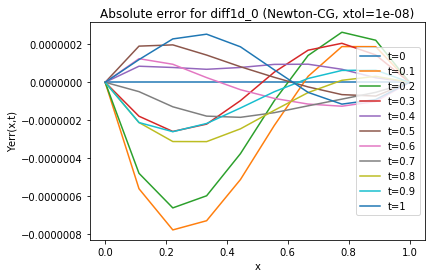

In [15]:
Y_err3 = Yt3 - Ya
for i in range(nt):
    plt.plot(xt, Y_err3[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, xtol=%g)' % (eq_name, trainalg, options['xtol']));

## Newton-CG (gtol=1e-10)

In [16]:
net4 = NNPDE2DIFF1D(eq)
trainalg = 'Newton-CG'
options = {}
options['disp'] = True
options['xtol'] = 1e-10
opts = {}
np.random.seed(0)
%timeit -n 1 -r 1 net4.train(x_train, trainalg=trainalg, options=options, opts=opts)
print(net4.res)

         Current function value: 0.000000
         Iterations: 56
         Function evaluations: 95
         Gradient evaluations: 3751
         Hessian evaluations: 0
7min 55s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
     fun: 8.928402634535559e-08
     jac: array([-3.19782622e-05,  3.08522594e-05, -2.78956880e-05, -9.68518673e-07,
       -4.19316670e-05,  2.64302512e-05,  2.06297385e-05, -1.39929199e-06,
        2.25992825e-05,  3.28187194e-05, -2.67468280e-05,  2.08253796e-05,
       -2.00661369e-05, -9.38030161e-07, -4.32241803e-05,  1.84172558e-05,
        2.28540067e-05, -8.59212064e-07,  1.60422466e-05,  2.28942372e-05,
       -2.97622815e-05,  2.98399861e-05, -2.55766706e-05, -9.85037668e-07,
       -4.31012387e-05,  2.80450232e-05,  2.20606164e-05, -9.18582705e-07,
        1.86453459e-05,  3.45165254e-05,  3.04003000e-04,  2.54861730e-04,
        2.37900872e-04,  2.90974334e-04,  5.70320413e-05,  1.81076707e-04,
        6.11176663e-05,  3.32916331e-04,  2.75364

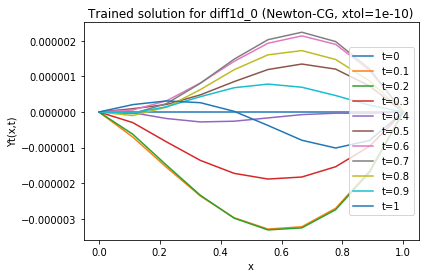

In [17]:
Yt4 = net4.run(x_train).reshape(nt, nx)
for i in range(nt):
    plt.plot(xt, Yt4[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yt(x,t)')
plt.legend(loc='right')
plt.title('Trained solution for %s (%s, xtol=%g)' % (eq_name, trainalg, options['xtol']));

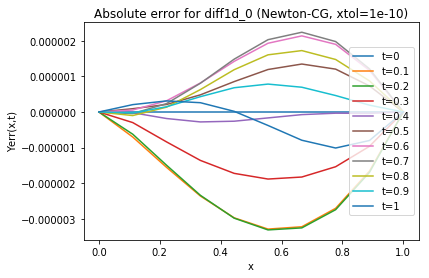

In [18]:
Y_err4 = Yt4 - Ya
for i in range(nt):
    plt.plot(xt, Y_err4[i], label="t=%g" % tt[i])
plt.xlabel('x')
plt.ylabel('Yerr(x,t)')
plt.legend(loc='right')
plt.title('Absolute error for %s (%s, xtol=%g)' % (eq_name, trainalg, options['xtol']));